In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
"""
Data files information:
    export_info.csv - Meta information on the export containing e.g. the export date or the data format version.
    pupil_positions.csv - A list of all pupil datums. See below for more information.
    gaze_positions.csv - A list of all gaze datums. See below for more information.
    pupil_gaze_positions_info.txt - Contains documentation on the contents of pupil_positions.csv and gaze_positions.csv
    world_viz.mp4 - The exported section of world camera video.
For more information see:
https://docs.pupil-labs.com/#data-format|
"""

In [2]:
# Set working directory
os.chdir(r'C:\temp\pupil\Export1\000')

In [39]:
# Load pupil data
pupil_df = pd.read_csv('pupil_positions.csv', header=0)

In [40]:
print("Columns in pupil data: " + '/n' + str(pupil_df.columns))

Columns in pupil data: /nIndex(['pupil_timestamp', 'world_index', 'eye_id', 'confidence', 'norm_pos_x',
       'norm_pos_y', 'diameter', 'method', 'ellipse_center_x',
       'ellipse_center_y', 'ellipse_axis_a', 'ellipse_axis_b', 'ellipse_angle',
       'diameter_3d', 'model_confidence', 'model_id', 'sphere_center_x',
       'sphere_center_y', 'sphere_center_z', 'sphere_radius',
       'circle_3d_center_x', 'circle_3d_center_y', 'circle_3d_center_z',
       'circle_3d_normal_x', 'circle_3d_normal_y', 'circle_3d_normal_z',
       'circle_3d_radius', 'theta', 'phi', 'projected_sphere_center_x',
       'projected_sphere_center_y', 'projected_sphere_axis_a',
       'projected_sphere_axis_b', 'projected_sphere_angle'],
      dtype='object')


In [51]:
print(pupil_df.head())

   pupil_timestamp  world_index  eye_id  confidence  norm_pos_x  norm_pos_y  \
0         2679.260            0       0       0.000       0.500       0.500   
1         2679.285            0       0       0.000       0.500       0.500   
2         2679.290            0       0       0.000       0.500       0.500   
3         2679.294            0       0       0.000       0.500       0.500   
4         2679.301            0       0       0.000       0.500       0.500   

   diameter  method  ellipse_center_x  ellipse_center_y  ...  \
0     0.000  3d c++            96.000            96.000  ...   
1     0.000  3d c++            96.000            96.000  ...   
2     0.000  3d c++            96.000            96.000  ...   
3     0.000  3d c++            96.000            96.000  ...   
4     0.000  3d c++            96.000            96.000  ...   

   circle_3d_normal_y  circle_3d_normal_z  circle_3d_radius  theta   phi  \
0              -0.000               0.000             0.000  0.0

In [22]:
"""
Pupil data - Columns description:
    timestamp - The timestamp at which the sample was recorded.
    eye_id - Identifies the eye to which the sample belongs to (from the wearer's POV!):
        By default id = 0 -> right eye
    confidence - Confidence in the pupil detection.
    norm_pos - The normalized position of the pupil in the eye image:
        (0,0) is bottom left corner of the eye image frame; 
        (1,1) is the top right corner of the eye image frame.
    diameter - The pupil diameter in pixels.
For more information see:
https://docs.pupil-labs.com/#data-format|
"""

"\nPupil data - Columns description:\n    timestamp - The timestamp at which the sample was recorded.\n    eye_id - Identifies the eye to which the sample belongs to (from the wearer's POV!):\n        By default id = 0 -> right eye\n    confidence - Confidence in the pupil detection.\n    norm_pos - The normalized position of the pupil in the eye image:\n        (0,0) is bottom left corner of the eye image frame; \n        (1,1) is the top right corner of the eye image frame.\n    diameter - The pupil diameter in pixels.\nFor more information see:\nhttps://docs.pupil-labs.com/#data-format|\n"

In [72]:
#pupil_df.set_index('id')
# Preview our data
eye0_df = pupil_df[pupil_df.eye_id == 0]
eye1_df = pupil_df[pupil_df.eye_id == 1]
pd.options.display.float_format = '{:.3f}'.format
print("eye0 (right eye) data: " + '\n' +
      str(eye0_df[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter']][:10]) )
print("eye1 data (left eye) data: " + '\n' +
      str(eye1_df[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter']][:10]) )

eye0 (right eye) data: 
    pupil_timestamp  eye_id  confidence  norm_pos_x  norm_pos_y  diameter
0          2679.260       0       0.000       0.500       0.500     0.000
1          2679.285       0       0.000       0.500       0.500     0.000
2          2679.290       0       0.000       0.500       0.500     0.000
3          2679.294       0       0.000       0.500       0.500     0.000
4          2679.301       0       0.000       0.500       0.500     0.000
5          2679.309       0       0.000       0.500       0.500     0.000
14         2679.387       0       0.000       0.500       0.500     0.000
15         2679.393       0       0.000       0.500       0.500     0.000
17         2679.399       0       0.000       0.500       0.500     0.000
19         2679.407       0       0.000       0.500       0.500     0.000
eye1 data (left eye) data: 
    pupil_timestamp  eye_id  confidence  norm_pos_x  norm_pos_y  diameter
6          2679.312       1       1.000       0.502       0.

Text(0.5, 1.0, 'Pupil Diameter')

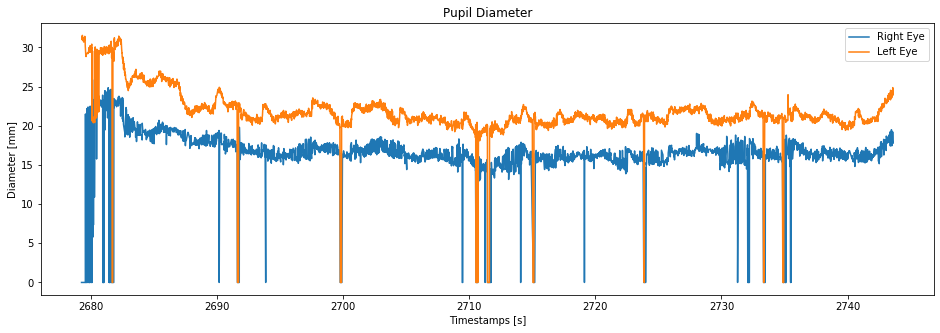

In [84]:
# Pupillometry: Pupil diameter (NO FILTER)
plt.figure(figsize=(16, 5))
plt.plot(eye0_df['pupil_timestamp'], eye0_df['diameter'])
plt.plot(eye1_df['pupil_timestamp'], eye1_df['diameter'])
plt.legend(['Right Eye', 'Left Eye'])
plt.xlabel('Timestamps [s]')
plt.ylabel('Diameter [mm]')
plt.title('Pupil Diameter')

In [ ]:
"""
As we can see there are unreasonable spikes in the data. 
These spikes are due to false positive pupil detections typically occuring during blinks. 
We can filter out most of the erroneous values using the confidence measure. 
"""

In [74]:
# Filtering out blinks:
eye0_high_conf_df = eye0_df[eye0_df['confidence'] > 0.95]
eye1_high_conf_df = eye1_df[eye1_df['confidence'] > 0.95]

Text(0.5, 1.0, 'Pupil Diameter (only high confidence values)')

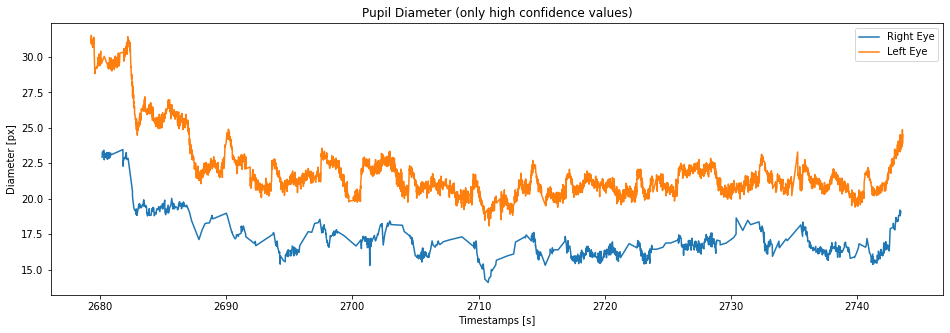

In [85]:
# Pupillometry: Pupil diameter (FILTERED)
plt.figure(figsize=(16, 5))
plt.plot(eye0_high_conf_df['pupil_timestamp'], eye0_high_conf_df['diameter'])
plt.plot(eye1_high_conf_df['pupil_timestamp'], eye1_high_conf_df['diameter'])
plt.legend(['Right Eye', 'Left Eye'])
plt.xlabel('Timestamps [s]')
plt.ylabel('Diameter [px]')
plt.title('Pupil Diameter (only high confidence values)')

In [ ]:
"""
Plotting Pupil Positions Over Time:
Low confidence points will not be visualized. 
The graph nicely shows periods of long fixations, e.g. as they happen during calibration
"""

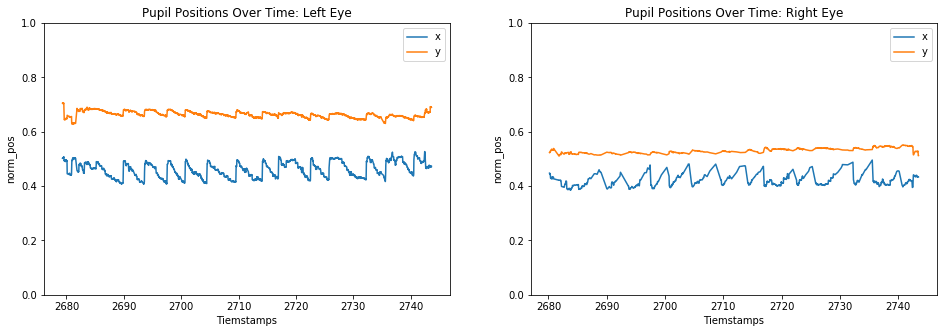

In [87]:
# Plot Settings:

plt.figure(figsize=(16, 5))

# Plot left eye
plt.subplot(1, 2, 1)
plt.plot(eye1_high_conf_df['pupil_timestamp'], eye1_high_conf_df['norm_pos_x'])
plt.plot(eye1_high_conf_df['pupil_timestamp'], eye1_high_conf_df['norm_pos_y'])
plt.xlabel('Tiemstamps')
plt.ylabel('norm_pos')
plt.ylim([0, 1])
plt.title('Pupil Positions Over Time: Left Eye')
plt.legend("xy")

# Plot right eye
plt.subplot(1, 2, 2)
plt.plot(eye0_high_conf_df['pupil_timestamp'], eye0_high_conf_df['norm_pos_x'])
plt.plot(eye0_high_conf_df['pupil_timestamp'], eye0_high_conf_df['norm_pos_y'])
plt.xlabel('Tiemstamps')
plt.ylabel('norm_pos')
plt.ylim([0, 1])
plt.title('Pupil Positions Over Time: Right Eye')
plt.legend("xy")

In [ ]:
"""
Spatial Distribution
Alternatively, we can visualize the spatial distribution of pupil positions 
in the eye image in form of a scatter plot. 
Again we discard low confidence points. 
We will color code each point with its timestamp, 
this way we can roughly see the trajectory each pupil had during the recording.
"""

Text(0.5, 1.0, 'Right Eye')

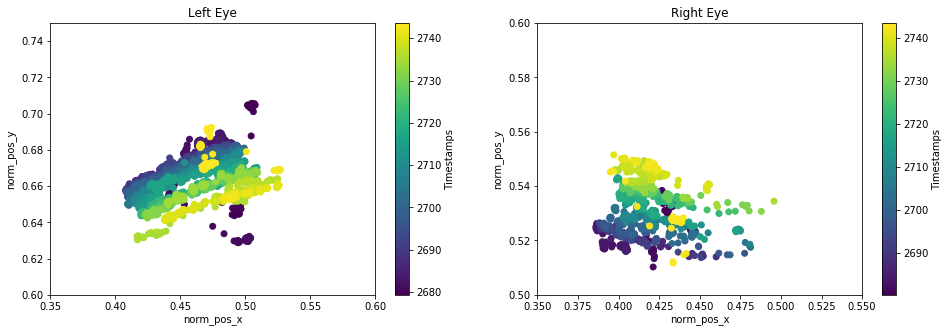

In [86]:
# Plot Settings
plt.figure(figsize=(16, 5))

# Plot left eye
plt.subplot(1, 2, 1)
plt.scatter(eye1_high_conf_df['norm_pos_x'], eye1_high_conf_df['norm_pos_y'], c=eye1_high_conf_df['pupil_timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0.35, 0.6]) # 0, 1
plt.ylim([0.6, 0.75]) # 0, 1
plt.title('Left Eye')

# Plot right eye
plt.subplot(1, 2, 2)
plt.scatter(eye0_high_conf_df['norm_pos_x'], eye0_high_conf_df['norm_pos_y'], c=eye0_high_conf_df['pupil_timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0.35, 0.55]) # 0, 1
plt.ylim([0.5, 0.6]) # 0, 1
plt.title('Right Eye')